In [2]:
%matplotlib inline
import pandas as pd

In [3]:
titles = pd.read_csv('E:/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.read_csv('E:/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:
pd.concat([titles,cast])

,title,year,name,type,character,n
0,The Rising Son,1990,NaN,NaN,NaN,NaN
1,The Thousand Plane Raid,1969,NaN,NaN,NaN,NaN
2,Crucea de piatra,1993,NaN,NaN,NaN,NaN
3,Country,2000,NaN,NaN,NaN,NaN
4,Gaiking II,2011,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3611207,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3611208,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3611209,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3611210,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [5]:
final=titles.merge(cast,on=['title','year'],how='outer')

In [12]:
final

,title,year,name,type,character,n
0,The Rising Son,1990,NaN,NaN,NaN,NaN
1,The Thousand Plane Raid,1969,Barry Atwater,actor,Gen. Conway,11.0
2,The Thousand Plane Raid,1969,J.D. Cannon,actor,Gen. Palmer,3.0
3,The Thousand Plane Raid,1969,John (IV) Carter,actor,Middleton,13.0
4,The Thousand Plane Raid,1969,Charles Dierkop,actor,Railla,15.0
...,...,...,...,...,...,...
3654069,Kroniki domowe,1997,Stanislawa Celinska,actress,Aunt,NaN
3654070,Kroniki domowe,1997,Paulina Kinaszewska,actress,Melania,NaN
3654071,Kroniki domowe,1997,Katarzyna Kwiatkowska,actress,Krewniaczka,NaN
3654072,Kroniki domowe,1997,Grazyna Szapolowska,actress,Mother,NaN


### What are the ten most common movie names of all time?

In [32]:
final.groupby(['title']).size().sort_values(ascending = False).head(10)

title
Around the World in Eighty Days       1298
7 cajas                                689
Thelma                                 580
The Ten Commandments                   533
The Eschatrilogy: Book of the Dead     517
Catching Faith                         493
The Dark Knight Rises                  452
Welcome to Essex                       448
Cockneys vs Zombies                    437
Stuck on You                           436
dtype: int64

### Which three years of the 1930s saw the most films released?

In [31]:
final[(final['year']>=1920)&(final['year']<=1930)].groupby(['year']).size().sort_values(ascending = False).head(3)

year
1930    9761
1920    8502
1929    7593
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [64]:
final[final['year']==final.year//10*10]['title'].nunique()

20682

### Plot the number of "Hamlet" films made each decade.

In [60]:
final[(final['title']=="Hamlet")&(final['year']==final.year//10*10)]['title'].count()


68

### Plot the number of "Rustler" characters in each decade of the history of film.

In [62]:
final[(final['character']=="Rustler")&(final['year']==final.year//10*10)]['title'].count()


9

### Plot the number of "Hamlet" characters each decade.

In [64]:
final[(final['character']=="Hamlet")&(final['year']==final.year//10*10)]['character'].count()

9

### What are the 11 most common character names in movie history?

In [70]:
final.groupby('character').size().sort_values(ascending = False).head(11)

character
Himself        19486
Dancer         11995
Extra          10887
Reporter        8127
Doctor          7402
Student         7146
Policeman       6855
Party Guest     6718
Nurse           6637
Bartender       6583
Minor Role      6219
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [78]:
final[final['character']=='Herself'].groupby('name').size().sort_values(ascending = False).head(10)

name
Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      7
Mary Jo Pehl           7
Joan Rivers            6
Hillary Clinton        6
Bunny Yeager           5
Marilyn Monroe         5
Rekha                  5
Caroline Rhea          5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [80]:
final[final['character']=='Himself'].groupby('name').size().sort_values(ascending = False).head(10).index.tolist()

['Adolf Hitler',
 'Richard Nixon',
 'Ronald Reagan',
 'John F. Kennedy',
 'Ron Jeremy',
 'George W. Bush',
 'Winston Churchill',
 'Benito Mussolini',
 'Franklin D. Roosevelt',
 'Bill Clinton']

### Which actors or actresses appeared in the most movies in the year 1945?

In [85]:
final[final['year']==1945].groupby(['name','type']).size().sort_values(ascending=False).head(1)

name          type 
Emmett Vogan  actor    39
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [86]:
final[final['year']==1985].groupby(['name','type']).size().sort_values(ascending=False).head(1)

name           type 
Shakti Kapoor  actor    21
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

<AxesSubplot:xlabel='year'>

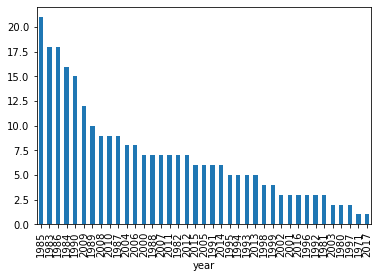

In [60]:
final[final['name']=='Mammootty'].groupby(['year']).size().sort_values(ascending=False).plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [32]:
cast[cast['character'].str.startswith('Patron in')]['character'].value_counts().head(10).index.tolist()

['Patron in Frisky Rabbit',
 'Patron in Chinese Restaurant',
 'Patron in the Coffee House',
 'Patron in Billiard Parlor',
 'Patron in restaurant',
 'Patron in Bar',
 'Patron in cabaret',
 'Patron in Club',
 'Patron in Restaurant',
 'Patron in Audience']

### What are the 10 most frequent roles that start with the word "Science"?

In [33]:
cast[cast['character'].str.startswith('Science')]['character'].value_counts().head(10).index.tolist()

['Science Teacher',
 'Science Fair Student',
 'Science Student',
 'Science Fair Judge',
 'Science Kid',
 'Science Reporter',
 'Science Club Member',
 'Science Promo Cadet',
 'Science',
 'Science teacher']

### Plot the n-values of the roles that Judi Dench has played over her career.

In [62]:
final[final['name']=='Judi Dench']['character'].head(15)

698                   The Narrator
85618                            M
134951                    Narrator
399022                 Miss Avocet
404289        Dame Sybil Thorndike
474394                        Wife
497259                   Nora Doel
512047       Mistress Nell Quickly
642981                     Paulina
812855                      Joanne
937853                Annie Hoover
956523     Lady Catherine de Bourg
1047029             Barbara Covett
1051408                          M
1191357       Princess Dragomiroff
Name: character, dtype: object

### Plot the n-values of Cary Grant's roles through his career.

In [43]:
final[final['name']=='Cary Grant']['character'].head(15)

121911            Gerald Fitzgerald
135229                Capt. Cassidy
168203                       Walter
222346                 Walter Burns
223734                      Himself
344408             Clip from 'Suzy'
405602                 George Kerby
409327               Jerry Warriner
438531    Lieutenant B.F. Pinkerton
440051                     Ridgeway
482959                  Roger Adams
490178          Dr. Noah Praetorius
492690                 Philip Adams
500957                        David
509232                 Jimmy Hudson
Name: character, dtype: object

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [44]:
final[final['name']=='Sidney Poitier']['character'].head(15)

349639                              Robertson
467807                      Dr. Luther Brooks
468854                          Steve Jackson
577242                         Mark Thackeray
636209                                   Buck
853983                          Inman Jackson
900314     FBI Deputy Director Carter Preston
1308077                         Manny Durrell
1362822                            Jack Parks
1370031                         Ben Munceford
1408754                           Tommy Tyler
1412522                      Dr. Matt Younger
1466293                    Walter Lee Younger
1488094                            Aly Mansuh
1499247                     Reverend Msimangu
Name: character, dtype: object

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [50]:
final[(final['year']==1950)&(final['n']==1)].groupby('type').size()

type
actor      621
actress    279
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [51]:
final[(final['year']==1950)&(final['n']==2)].groupby('type').size()

type
actor      433
actress    412
dtype: int64